# Perform Exploratory Data Analysis (EDA) to uncover interesting patterns, insights, and potential anomalies within the Weather dataset.

In [151]:
#Importing the required libraries
import pandas as pd
import numpy as np

## 1. Data Overview and Cleaning:
### What are the key characteristics of the dataset? (e.g., number of records, features, data types)

In [153]:
#Loading the dataset
weather_df = pd.read_csv('1. Weather Data.csv')
#Understanding the dataset
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [155]:
#Checking the number of records in the dataset
weather_df.shape

(8784, 8)

In [157]:
#Checking the datatypes in the dataset
weather_df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

### Identify and handle any missing or null values. Describe your approach and reasoning.

In [159]:
#Checking for null values
weather_df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

We have 0 missing values in this dataset as checked above.

### Check for and address any duplicate records

In [161]:
weather_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

There are no duplicates in the dataset

## 2. Statistical Summary

### Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.

In [163]:
#Summary statistics
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### Identify and describe any significant outliers in the data.

In [165]:
# Calculate Z-scores
weather_df['Z-Score'] = (weather_df['Temp_C'] - weather_df['Temp_C'].mean()) / weather_df['Temp_C'].std()

# Identify outliers
outliers = weather_df[np.abs(weather_df['Z-Score']) > 3]
print("Outliers based on Z-Score:\n", outliers)

Outliers based on Z-Score:
 Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather, Z-Score]
Index: []


There are no outliers in the dataset

## 3. Data Visualization:
### Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

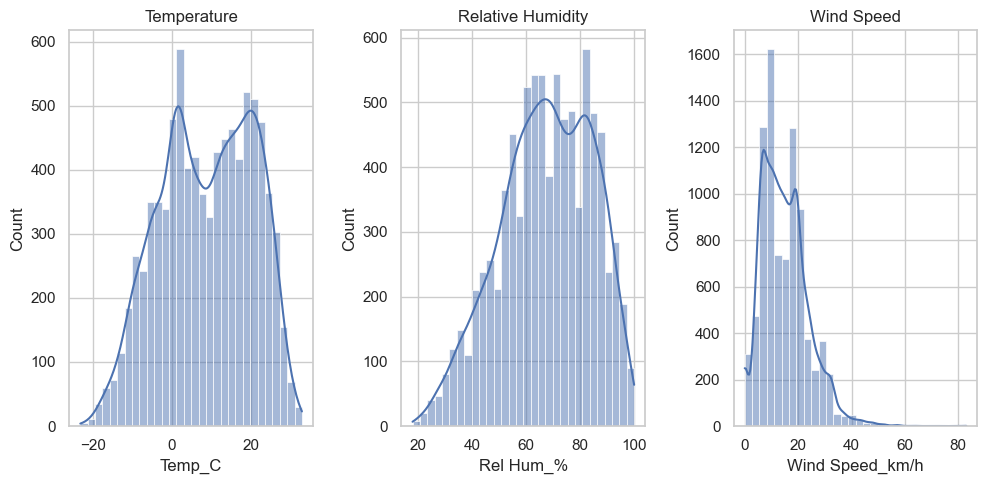

In [141]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots arranged side by side
plt.figure(figsize=(20, 5))

# Plot for Temperature
plt.subplot(1, 6, 1)
sns.histplot(weather_df['Temp_C'], kde=True, bins=30)
plt.title('Temperature')

# Plot for Relative Humidity
plt.subplot(1, 6, 2)
sns.histplot(weather_df['Rel Hum_%'], kde=True, bins=30)
plt.title('Relative Humidity')

# Plot for Wind Speed
plt.subplot(1, 6, 3)
sns.histplot(weather_df['Wind Speed_km/h'], kde=True, bins=30)
plt.title('Wind Speed')

plt.tight_layout()
plt.show()


### Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.

In [167]:
# Convert the Date_Time column to datetime format
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'])

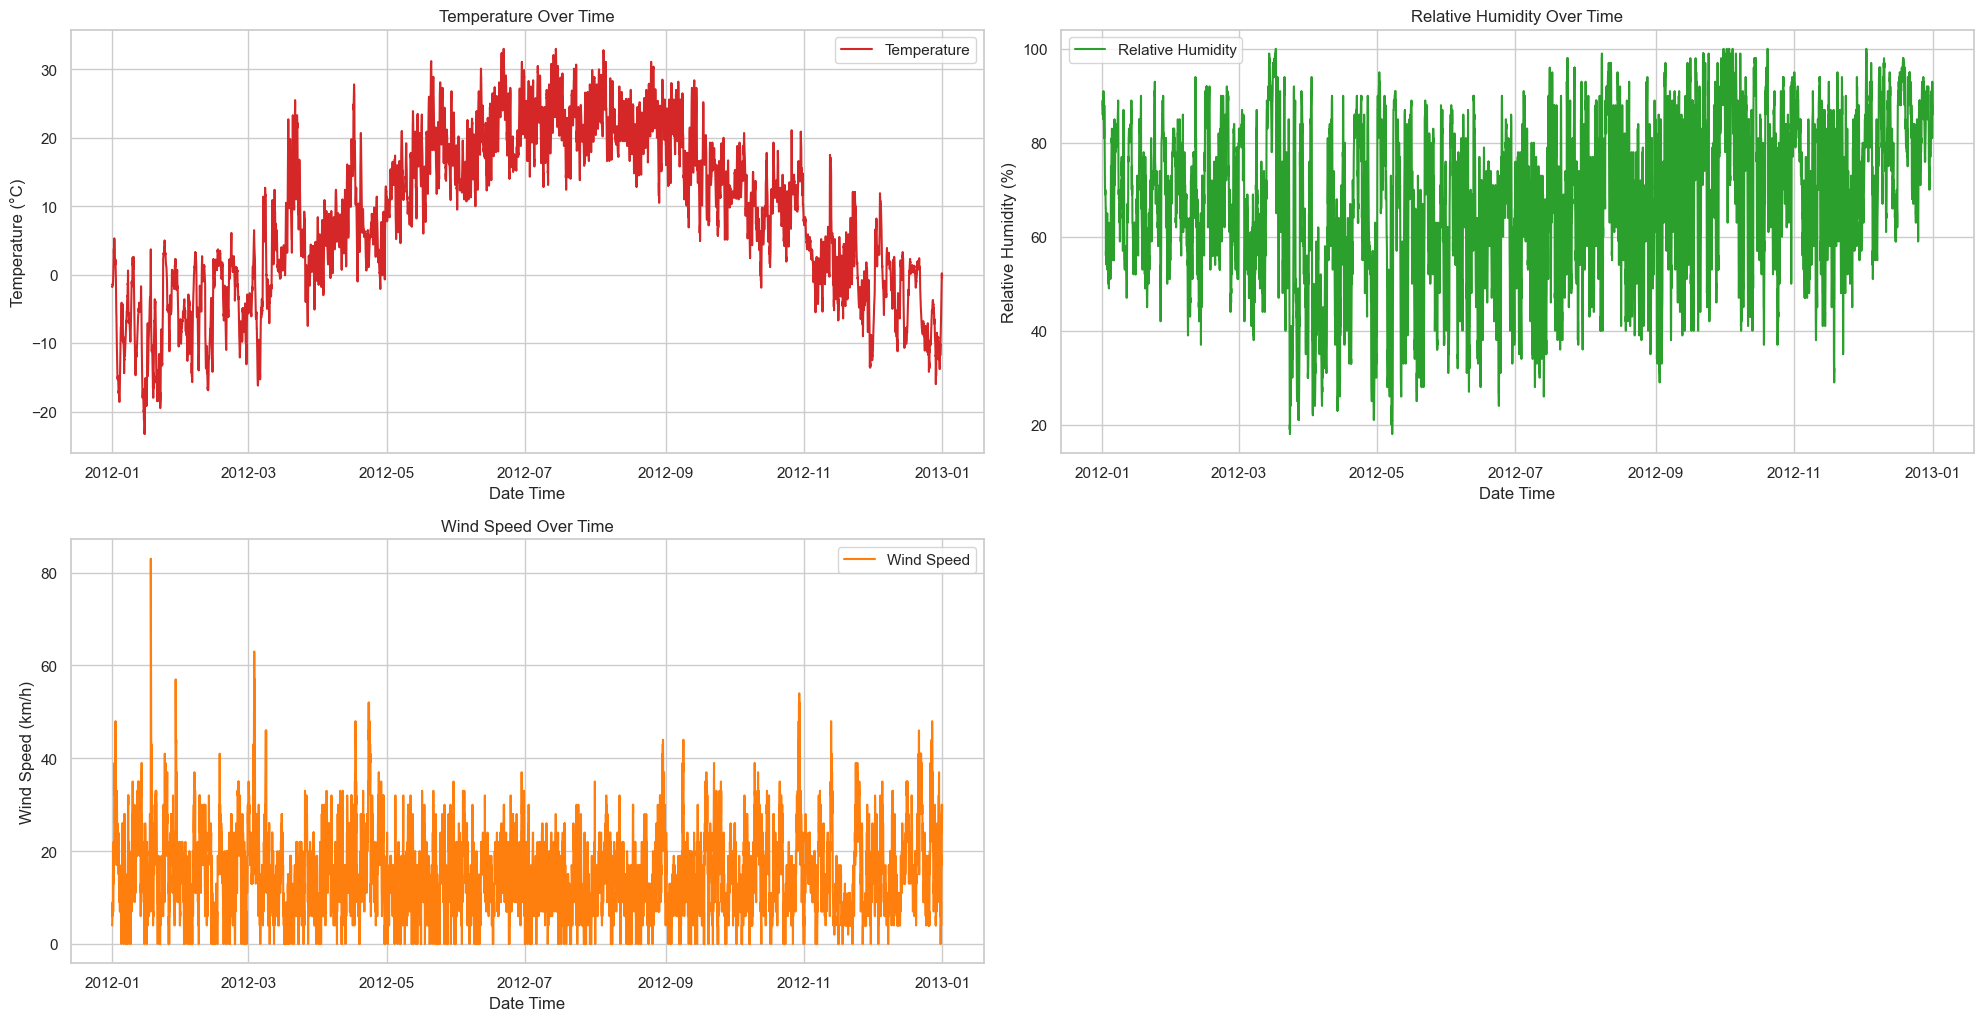

In [169]:
# Set the Date_Time column as the index
weather_df.set_index('Date/Time', inplace=True)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots for each weather parameter
plt.figure(figsize=(20, 15))

# Plot for Temperature
plt.subplot(3, 2, 1)
plt.plot(weather_df.index, weather_df['Temp_C'], label='Temperature', color='tab:red')
plt.title('Temperature Over Time')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot for Relative Humidity
plt.subplot(3, 2, 2)
plt.plot(weather_df.index, weather_df['Rel Hum_%'], label='Relative Humidity', color='tab:green')
plt.title('Relative Humidity Over Time')
plt.xlabel('Date Time')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.grid(True)

# Plot for Wind Speed
plt.subplot(3, 2, 3)
plt.plot(weather_df.index, weather_df['Wind Speed_km/h'], label='Wind Speed', color='tab:orange')
plt.title('Wind Speed Over Time')
plt.xlabel('Date Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Create correlation matrices and heatmaps to identify relationships between different weather parameters.

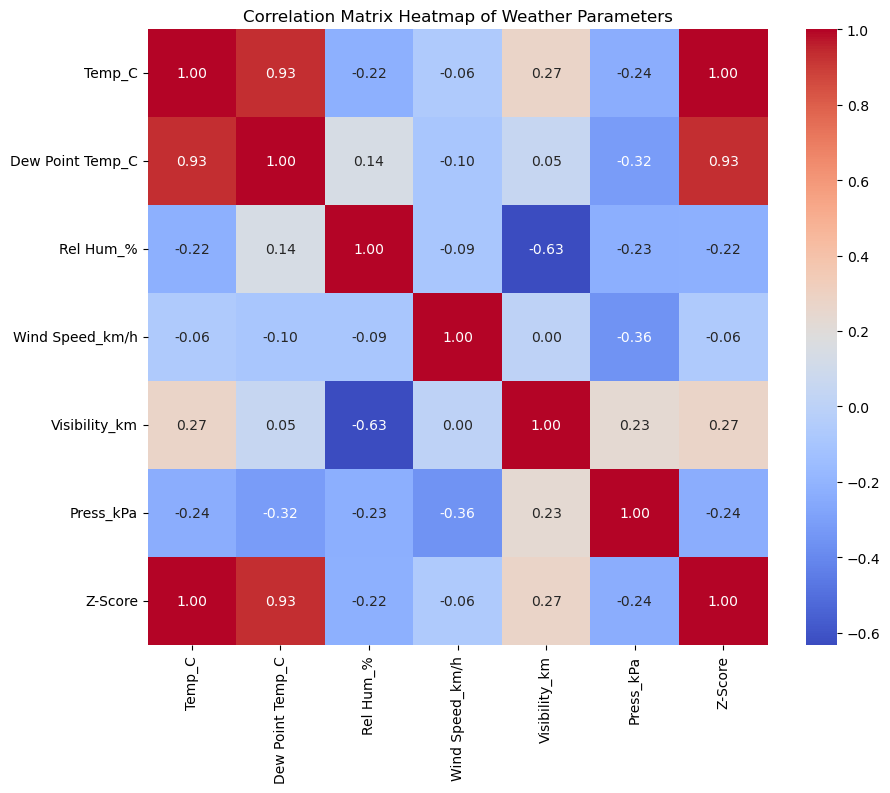

In [75]:
#Calculating the correlation matrix
# Select only the numeric columns
numeric_df = weather_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
#Plotting the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap of Weather Parameters')
plt.show()

## 4. Weather Patterns and Trends:
### Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?

In [139]:
# Calculate average temperature and humidity by month
monthly_avg = weather_df.resample('ME').agg({
    'Temp_C': 'mean',
    'Rel Hum_%': 'mean'
})
monthly_avg

,Temp_C,Rel Hum_%
Date/Time,,
2012-01-31,-7.371505,68.383065
2012-02-29,-4.225000,68.956897
2012-03-31,3.121237,64.862903
2012-04-30,7.009306,56.150000
2012-05-31,16.237769,61.760753
2012-06-30,20.134028,60.643056
2012-07-31,22.790054,62.017473
2012-08-31,22.279301,67.943548
2012-09-30,16.484444,71.165278


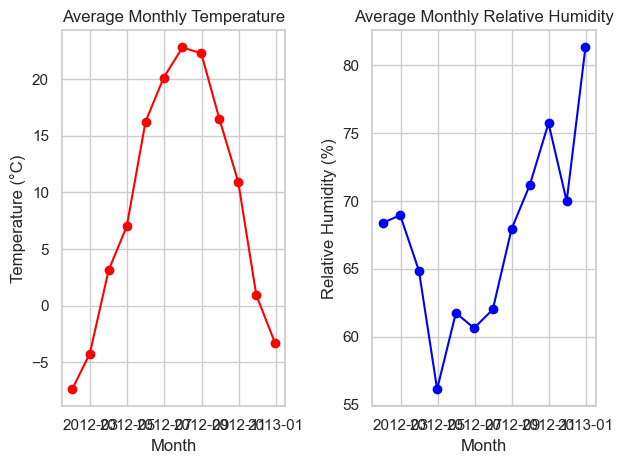

In [135]:
# Plot for Average Monthly Temperature
plt.subplot(1, 2, 1)
plt.plot(monthly_avg.index, monthly_avg['Temp_C'], marker='o', color='red')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Plot for Average Monthly Relative Humidity
plt.subplot(1, 2, 2)
plt.plot(monthly_avg.index, monthly_avg['Rel Hum_%'], marker='o', color='blue')
plt.title('Average Monthly Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


### Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

* Industrial emmisions can have significant implications on local tempertures and humidity.
* Changes in weather patterns are likely to be as a result of increased urbanization.

## 5. Insights and Conclusions:
### Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?

* July has the highest average temperature, with the lowest levels being recorded in January.
* Relative humidity is highest in December with the levels being the lowest in April.

### How can these insights be useful for weather prediction or other practical applications?

* The above insights on seasonal trends can assist farmers in planning for crop planting and harvesting. for instance, farmers can use the above data to select crops that thrive under low humidity.
* Tourism firms can use the knowledge on seasonal trends to plan for recreational activities.
* Weather pattern insights can help inform policy making on climate change.

## 6. Recommendations for Further Analysis:
### Suggest areas for further analysis or additional data that might be useful to explore.

* There is need to critically analyze snow and rainfall data to understand its impact on humidity and temperature.
* Incorporate machine learning methods to predict weather patterns based on historical data.